In [1]:
# Architecture/storage (incl. trust): [big data, IOT/internet of things, cloud, "blockchain"]

project = "architecture_storage"

import pandas

from web_observatory import start_project
start_project(project)

Done!


In [2]:
# Get tweets about digital conservation architecture/storage (Historical focus)
from web_observatory import search_twitter
bd_twitter = search_twitter(q = 'conservation "big data" has:links', project=project)
iot_twitter = search_twitter(q = 'conservation data ("internet of things" OR IOT) has:links', project=project)
cld_twitter = search_twitter(q = 'conservation cloud has:links', project=project)
blck_twitter = search_twitter(q = 'conservation blockchain has:links', project=project)

{'query': 'conservation "big data" has:links', 'tweet.fields': 'created_at,entities,public_metrics', 'max_results': 100, 'start_time': '2006-03-21T00:00:00.00Z', 'end_time': '2022-01-01T00:00:00.00Z'}
Done!
{'query': 'conservation data ("internet of things" OR IOT) has:links', 'tweet.fields': 'created_at,entities,public_metrics', 'max_results': 100, 'start_time': '2006-03-21T00:00:00.00Z', 'end_time': '2022-01-01T00:00:00.00Z'}
Done!
{'query': 'conservation cloud has:links', 'tweet.fields': 'created_at,entities,public_metrics', 'max_results': 100, 'start_time': '2006-03-21T00:00:00.00Z', 'end_time': '2022-01-01T00:00:00.00Z'}
Done!
{'query': 'conservation blockchain has:links', 'tweet.fields': 'created_at,entities,public_metrics', 'max_results': 100, 'start_time': '2006-03-21T00:00:00.00Z', 'end_time': '2022-01-01T00:00:00.00Z'}
Done!


In [3]:
# Get Google results about platforms in nature conservation (Relevance)
from web_observatory import search_google
bd_google = search_google(q = 'nature conservation big data', project = project)
iot_google = search_google(q = 'nature conservation iot internet of things', project = project)
cld_google = search_google(q = 'nature conservation cloud', project = project)
blck_google = search_google(q = 'nature conservation blockchain', project = project)

Done
Done
Done
Done


In [3]:
# Compile results
from web_observatory import twitter_process 
twitter = twitter_process(project=project)
from web_observatory import google_process
google = google_process(datatype = "CSV", project=project)

In [4]:
# Extract organizations from Twitter/Google results
from web_observatory import get_domains
twitter = get_domains(twitter)
google = get_domains(google)
twitter.groupby(by="domain").count().sort_values(by="link", ascending=False).head(20)
google.groupby(by="domain").count().sort_values(by="link", ascending=False).head(20)

,date,link,metrics,source,query
domain,,,,,
nature,0,9,0,9,9
nih,0,6,0,6,6
microsoft,0,5,0,5,5
springer,0,3,0,3,3
weforum,0,3,0,3,3
sciencedirect,0,3,0,3,3
researchgate,0,3,0,3,3
ieee,0,3,0,3,3
cisco,0,2,0,2,2


In [5]:
# Process all data together 
from web_observatory import search_merge
pages = search_merge(twitter = twitter, google = google, project = project)
pages

,date,link,metrics,source,query,domain
0,2010-12-12T16:04:15.000Z,http://envirolaw.com/owns-clouds/,0.0,Twitter,conservation cloud has:links,envirolaw
1,2011-05-20T20:24:35.000Z,http://www.electronichouse.com/article/water_c...,0.0,Twitter,conservation cloud has:links,electronichouse
2,2011-06-05T00:10:25.000Z,http://group0middleearth.blogspot.com/2011/06/...,0.0,Twitter,conservation cloud has:links,blogspot
3,2011-06-27T23:12:59.000Z,http://ih.advfn.com/p.php?pid=nmona&article=48...,0.0,Twitter,conservation cloud has:links,advfn
4,2011-07-04T16:47:11.000Z,http://bit.ly/iT4mcA,0.0,Twitter,conservation cloud has:links,bit
...,...,...,...,...,...,...
6175,NaN,https://www3.weforum.org/docs/WEF_Building-Blo...,NaN,Google,nature conservation blockchain,weforum
6176,NaN,https://www.thefreshwatertrust.org/state-of-ca...,NaN,Google,nature conservation blockchain,thefreshwatertrust
6177,NaN,https://wwf.ca/stories/ai-blockchain-nature/,NaN,Google,nature conservation blockchain,wwf
6178,NaN,https://mobile.twitter.com/danbrockington/stat...,NaN,Google,nature conservation blockchain,twitter


In [6]:
# Manage duplication of links here....
## Load previous "all_search_results"
p1 = pandas.read_csv("AI_ML/all_search_results.csv")
p2 = pandas.read_csv("algorithm/all_search_results.csv")
p3 = pandas.read_csv("platform/all_search_results.csv")
previous = pandas.concat([p1, p2, p3], ignore_index=True)
## De-duplicate from this list of pages where there is a match on previous search
pages = pages[~pages["link"].isin(previous["link"])]
pages.reset_index(inplace=True, drop=True)
pages

,date,link,metrics,source,query,domain
0,2010-12-12T16:04:15.000Z,http://envirolaw.com/owns-clouds/,0.0,Twitter,conservation cloud has:links,envirolaw
1,2011-05-20T20:24:35.000Z,http://www.electronichouse.com/article/water_c...,0.0,Twitter,conservation cloud has:links,electronichouse
2,2011-06-05T00:10:25.000Z,http://group0middleearth.blogspot.com/2011/06/...,0.0,Twitter,conservation cloud has:links,blogspot
3,2011-06-27T23:12:59.000Z,http://ih.advfn.com/p.php?pid=nmona&article=48...,0.0,Twitter,conservation cloud has:links,advfn
4,2011-07-04T16:47:11.000Z,http://bit.ly/iT4mcA,0.0,Twitter,conservation cloud has:links,bit
...,...,...,...,...,...,...
5623,NaN,https://www.cryptoaltruism.org/blog/20-web3-pr...,NaN,Google,nature conservation blockchain,cryptoaltruism
5624,NaN,https://www3.weforum.org/docs/WEF_Building-Blo...,NaN,Google,nature conservation blockchain,weforum
5625,NaN,https://www.thefreshwatertrust.org/state-of-ca...,NaN,Google,nature conservation blockchain,thefreshwatertrust
5626,NaN,https://mobile.twitter.com/danbrockington/stat...,NaN,Google,nature conservation blockchain,twitter


In [7]:
# Get Twitter archives
#pages = pandas.read_csv("algorithm/all_search_results.csv")
from web_observatory import get_versions
results = get_versions(pages, project = project)
results

/Users/enost/Downloads/observatory_dev_v02.py:694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pages["full_url"] = None # The actual url and not some bit.ly url
/Users/enost/Downloads/observatory_dev_v02.py:695: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pages["url_meta"] = None # Possible additional information
/Users/enost/Downloads/observatory_dev_v02.py:696: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

,date,link,metrics,source,query,domain,full_url,url_meta,wm_url,wm_meta
0,2010-12-12T16:04:15.000Z,http://envirolaw.com/owns-clouds/,0.0,Twitter,conservation cloud has:links,envirolaw,http://envirolaw.com/owns-clouds/,None,http://web.archive.org/web/20160709235924id_/h...,No Time-of-Tweet Versions; Got Older Version
1,2011-05-20T20:24:35.000Z,http://www.electronichouse.com/article/water_c...,0.0,Twitter,conservation cloud has:links,electronichouse,http://www.electronichouse.com/article/water_c...,None,http://web.archive.org/web/20110519205449id_/h...,Time-of-Tweet Version
2,2011-06-05T00:10:25.000Z,http://group0middleearth.blogspot.com/2011/06/...,0.0,Twitter,conservation cloud has:links,blogspot,http://group0middleearth.blogspot.com/2011/06/...,None,None,No Wayback Version; Got Live URL
3,2011-06-27T23:12:59.000Z,http://ih.advfn.com/p.php?pid=nmona&article=48...,0.0,Twitter,conservation cloud has:links,advfn,http://ih.advfn.com/p.php,None,http://web.archive.org/web/20110624145547id_/h...,Time-of-Tweet Version
4,2011-07-04T16:47:11.000Z,http://bit.ly/iT4mcA,0.0,Twitter,conservation cloud has:links,bit,https://www.afternic.com:443/forsale/smarterte...,None,http://web.archive.org/web/20220423083916id_/h...,No Time-of-Tweet Versions; Got Older Version
...,...,...,...,...,...,...,...,...,...,...
5623,NaN,https://www.cryptoaltruism.org/blog/20-web3-pr...,NaN,Google,nature conservation blockchain,cryptoaltruism,https://www.cryptoaltruism.org/blog/20-web3-pr...,None,None,Not historical
5624,NaN,https://www3.weforum.org/docs/WEF_Building-Blo...,NaN,Google,nature conservation blockchain,weforum,https://www3.weforum.org/docs/WEF_Building-Blo...,None,None,Not historical
5625,NaN,https://www.thefreshwatertrust.org/state-of-ca...,NaN,Google,nature conservation blockchain,thefreshwatertrust,https://www.thefreshwatertrust.org/state-of-ca...,None,None,Not historical
5626,NaN,https://mobile.twitter.com/danbrockington/stat...,NaN,Google,nature conservation blockchain,twitter,https://mobile.twitter.com/danbrockington/stat...,None,None,Not historical


In [8]:
# Scrape pages
## Initialize / De-duplicate full urls
#results = pandas.read_csv(project+"/page_versions_full.csv")
from web_observatory import initialize_scrape
urls = initialize_scrape(versions = results, project = project) 

/Users/enost/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1681: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = empty_value
/Users/enost/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/Users/enost/Downloads/observatory_dev_v02.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

Done!


/Users/enost/Downloads/observatory_dev_v02.py:851: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  versions['date'] = pandas.to_datetime(versions['date']).dt.strftime('%Y-%U') # Convert to year/week


In [9]:
%cd digcon_scraper/digcon_scraper/
from web_observatory import scrape
scrape(urls)

/Users/enost/Downloads/digcon_scraper/digcon_scraper


2022-06-29 14:00:50 [py.warnings] WARNING: /Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/extensions/feedexport.py:289: ScrapyDeprecationWarning: The `FEED_URI` and `FEED_FORMAT` settings have been deprecated in favor of the `FEEDS` setting. Please see the `FEEDS` setting docs for more details
  exporter = cls(crawler)



2022-06-29 14:00:59 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET http://www.andina.com.pe/espanol/noticia-new-conservation-area-in-peru-protects-rare-cat-birds-cloud-forests-40212> (failed 3 times): 500 Internal Server Error


2022-06-29 14:01:15 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://www.jcnnewswire.com/press_release/26542/fujitsu_provides_free_cloud_service_to_ten_organizations_involved_in_biodiversity_conservation_activities> (failed 3 times): 500 Internal Server Error


2022-06-29 14:01:48 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET http://web.archive.org/web/20201012192825id_/http://www.redandblack.com/uganews/uga-ibm-work-with-farmers-on-water-conservation-project/article_f0da8c24-cfbf-11e3-8424-0017a43b2370.html> (failed 3 times): 429 Unknown Status


2022-06-29 14:01:49 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET http://hp.nu/ycpzp> (failed 3 times): 503 Service Unavailable
2022-06-29 14:01:49 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET http://hp.nu/yidca> (failed 3 times): 503 Service Unavailable
2022-06-29 14:01:49 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET http://hp.nu/yidwi> (failed 3 times): 503 Service Unavailable


2022-06-29 14:01:49 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET http://hp.nu/yie9l> (failed 3 times): 503 Service Unavailable


2022-06-29 14:01:50 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET http://hp.nu/yctwx> (failed 3 times): 503 Service Unavailable


2022-06-29 14:01:51 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET http://www.sciencenewsdaily.org/ecology-news/cluster602944740/> (failed 3 times): 500 Internal Server Error


2022-06-29 14:01:59 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET http://hn-blog/project-chicchan/heads-in-the-cloudsat-community-cloud-forest-conservation/> (failed 3 times): DNS lookup failed: no results for hostname lookup: hn-blog.


2022-06-29 14:01:59 [scrapy.core.scraper] ERROR: Error downloading <GET http://hn-blog/project-chicchan/heads-in-the-cloudsat-community-cloud-forest-conservation/>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 857, in _runCallbacks
    current.result = callback(  # type: ignore[misc]
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/endpoints.py", l

2022-06-29 14:02:12 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET http://hp.nu/hfyxw> (failed 3 times): 503 Service Unavailable


2022-06-29 14:02:15 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET http://localhost/> (failed 3 times): Connection was refused by other side: 61: Connection refused.
2022-06-29 14:02:15 [scrapy.core.scraper] ERROR: Error downloading <GET http://localhost/>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
twisted.internet.error.ConnectionRefusedError: Connection was refused by other side: 61: Connection refused.


2022-06-29 14:02:26 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET http://hp.nu/oxhuz> (failed 3 times): 503 Service Unavailable


2022-06-29 14:02:32 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET http://www.texasishot.org/blog/big-data-and-energy-conservation-follow-the-money/> (failed 3 times): 500 Internal Server Error


2022-06-29 14:02:43 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://blog.graphisoftus.com/gl2s7zsv> (failed 3 times): 503 Service Unavailable


2022-06-29 14:02:49 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET http://www.evscorporation.com/cloud-blog/cloud-computing-a-peek-into-datacenter-power-efficiency-management> (failed 3 times): 500 Internal Server Error


2022-06-29 14:02:51 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://onlinelibrary.wiley.com/doi/10.1111/izy.12107/abstract> (failed 3 times): 503 Service Unavailable


2022-06-29 14:03:13 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://www.dub.io/s/33577> (failed 3 times): 500 Internal Server Error


2022-06-29 14:04:00 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://www.vubblepop.com/embed/video/cfcmedialab/could-blockchain-save-the-amazon-rainforest/253/> (failed 3 times): 500 Internal Server Error


2022-06-29 14:04:21 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://journals.sagepub.com/doi/full/10.1177/1940082918780359> (failed 3 times): 503 Service Unavailable


2022-06-29 14:04:41 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET http://www.simpleweatheralert.com/cgi-bin/weatherdetail.py> (failed 3 times): 500 Internal Server Error


2022-06-29 14:04:48 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET http://web.archive.org/web/20211219113353id_/http://news.nationalgeographic.com/2016/09/honduras-tree-frogs-conservation-chytrid-fungus-logging-harcc/> (failed 3 times): 503 Service Unavailable


2022-06-29 14:04:51 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://set4earth.com/our-project.html> (failed 3 times): 522 Unknown Status


2022-06-29 14:04:52 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1557-9263.2008.00184.x> (failed 3 times): 503 Service Unavailable


2022-06-29 14:05:16 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET http://hie.social/d9mx30md2vj> (failed 3 times): 503 Service Unavailable


2022-06-29 14:05:23 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://onlinelibrary.wiley.com/doi/full/10.1111/btp.12596> (failed 3 times): 503 Service Unavailable


2022-06-29 14:05:35 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://www.quora.com/How-is-blockchain-technology-going-to-change-the-world> (failed 3 times): 429 Unknown Status


2022-06-29 14:06:01 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://app-development-company-nyc.quora.com/3-Ways-Blockchain-And-Cryptocurrency-Will-Help-Us-Go-Green-In-2019> (failed 3 times): 429 Unknown Status


2022-06-29 14:06:12 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://www.heliyon.com/article/e01423> (failed 3 times): 503 Service Unavailable


2022-06-29 14:06:19 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://blockblog.fr/fidelity-franchit-une-nouvelle-etape-dans-le-domaine-de-la-crypto-avec-le-negoce-et-la-conservation/> (failed 3 times): 522 Unknown Status


2022-06-29 14:06:40 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://www.linkedin.com/leap/r> (failed 3 times): 502 Bad Gateway


2022-06-29 14:06:44 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://blockblog.fr/agora-altx-lance-une-nouvelle-blockchain-de-conservation-des-enregistrements-pour-ladministration-des-fonds/> (failed 3 times): 522 Unknown Status


2022-06-29 14:06:46 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://www.cell.com/trends/ecology-evolution/fulltext/s0169-5347(19)30299-x> (failed 3 times): 503 Service Unavailable


2022-06-29 14:06:54 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://blockblog.fr/des-solutions-de-conservation-sont-necessaires-pour-une-adoption-institutionnelle-generalisee-selon-crypto-analyst/> (failed 3 times): 522 Unknown Status


2022-06-29 14:07:06 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://anith.com/its-a-jungle-out-there-when-it-comes-to-conservation-tech-but-theres-a-cloud-for-that/> (failed 3 times): 500 Internal Server Error


2022-06-29 14:07:21 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://blockblog.fr/dubai-se-tourne-vers-la-technologie-blockchain-pour-la-conservation-de-lenvironnement/> (failed 3 times): 522 Unknown Status


2022-06-29 14:07:21 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://blockblog.fr/shapeshift-montre-un-nouveau-visage-un-echange-complet-sans-conservation/> (failed 3 times): 522 Unknown Status


2022-06-29 14:07:23 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://chu.tbe.taleo.net/chu04/ats/careers/v2/viewrequisition> (failed 3 times): 500 Internal Server Error


2022-06-29 14:07:40 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://journals.sagepub.com/doi/abs/10.1177/1940082920961491> (failed 3 times): 503 Service Unavailable


2022-06-29 14:07:43 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://onlinelibrary.wiley.com/doi/full/10.1111/ecog.01205> (failed 3 times): 503 Service Unavailable


2022-06-29 14:08:05 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://journals.sagepub.com/doi/abs/10.1177/1940082921989196> (failed 3 times): 503 Service Unavailable


2022-06-29 14:08:12 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://blockblog.fr/bitgo-fournit-les-premieres-solutions-de-portefeuille-et-de-conservation-multi-signatures-a-tron/> (failed 3 times): 522 Unknown Status


2022-06-29 14:08:14 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://phh.tbe.taleo.net/phh04/ats/careers/v2/viewrequisition> (failed 3 times): 500 Internal Server Error


2022-06-29 14:08:53 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://www.newvisionsoftware.in/cases/a-niche-start-up-patented-iot-and-blockchain-based-smart-building-solution-for-energy-conservation/> (failed 3 times): [<twisted.python.failure.Failure twisted.internet.error.ConnectionLost: Connection to the other side was lost in a non-clean fashion: Connection lost.>]


2022-06-29 14:08:53 [scrapy.core.scraper] ERROR: Error downloading <GET https://www.newvisionsoftware.in/cases/a-niche-start-up-patented-iot-and-blockchain-based-smart-building-solution-for-energy-conservation/>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
twisted.web._newclient.ResponseNeverReceived: [<twisted.python.failure.Failure twisted.internet.error.ConnectionLost: Connection to the other side was lost in a non-clean fashion: Connection lost.>]


2022-06-29 14:09:07 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://onlinelibrary.wiley.com/doi/10.1002/ece3.8118> (failed 3 times): 503 Service Unavailable


2022-06-29 14:09:09 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://www.cell.com/current-biology/fulltext/s0960-9822(21)00912-x> (failed 3 times): 503 Service Unavailable


2022-06-29 14:09:16 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://onlinelibrary.wiley.com/doi/10.1111/aec.13123> (failed 3 times): 503 Service Unavailable


2022-06-29 14:09:36 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://ieeexplore.ieee.org/document/8974330> (failed 3 times): 503 Service Unavailable


2022-06-29 14:09:39 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://www.cambridge.org/core/books/tropical-montane-cloud-forests/92bba7612b2e9ea00ce0f36a5c984883> (failed 3 times): 500 Internal Server Error


2022-06-29 14:09:41 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://www.science.org/doi/10.1126/science.abg1780> (failed 3 times): 503 Service Unavailable


In [11]:
%cd ..

/Users/enost/Downloads


In [12]:
# Quality control
from web_observatory import query
## Create a copy of the text table
query("copy") # Only need to do this once!
## Remove from db where there was no text scraped
query("filter_empty")
## Remove anything without at least 1 keyword?
queryterms = ["nature ", "conservation "] # spaces to avoid certain spam...
query("filter_words", terms = queryterms) ## TBD: Need to remove French-language sites?

Done!
Done!
Done!


In [15]:
## Get word counts
from web_observatory import query
tech_terms = ["artificial intelligence", " ai ", "machine learning", "dashboard", "platform", "blockchain", "cloud", "big data", "internet of things"] # Spaces in ai to capture its use as in AI rather than e.g. said
cons_terms = ["conservation", "nature"]
#grammar = ["is", "will"] # for phrases
topics = ["forest", "mountain", "wetland", "boreal", "ocean", "river", "arctic"]
ethics = ["privacy", "surveillance", "cost", "ethics"]
tools = ["market", "decision making", "working land", "indigenous-led", "easement", "decision support", "decision-support"]
combined_terms = tech_terms + cons_terms + topics + ethics + tools

words = query("get_words", combined_terms)
words

,url,domain,source,date,artificial intelligence,ai,machine learning,dashboard,platform,blockchain,...,surveillance,cost,ethics,market,decision making,working land,indigenous-led,easement,decision support,decision-support
0,http://web.archive.org/web/20140731104236id_/h...,chesterfieldpost,Twitter,2011-36,0,0,0,0,0,0,...,0,3,0,1,0,0,0,0,0,0
1,https://www.freelancer.com/projects/machine-le...,freelancer,Twitter,2012-16,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,http://web.archive.org/web/20210410214115id_/h...,goathunter,Twitter,2012-08,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,http://web.archive.org/web/20210517215004id_/h...,zmescience,Twitter,2021-21,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,http://web.archive.org/web/20120901133326id_/h...,twocircles,Twitter,2012-31,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26521,http://web.archive.org/web/20211111060840id_/h...,ohnocrypto,Twitter,2021-45,0,0,0,0,0,5,...,0,1,0,3,0,0,0,0,0,0
26522,http://web.archive.org/web/20211106153803id_/h...,is,Twitter,2021-44,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26523,http://web.archive.org/web/20211118100737id_/h...,cryptoast,Twitter,2021-46,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
26524,http://web.archive.org/web/20211210072427id_/h...,scoop,Twitter,2021-49,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


2022-06-29 14:31:13 [py.warnings] WARNING: /Users/enost/Downloads/observatory_dev_v02.py:1146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  counts['date'].update(counts['date'].str.slice(0,4)) # Get the year

2022-06-29 14:31:13 [py.warnings] WARNING: /Users/enost/Downloads/observatory_dev_v02.py:1147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  counts['date'].update(pandas.to_datetime(counts["date"], format="%Y").dt.to_period("Y")) # Convert specific year/weeks to years #counts['date'].dt.to_timestamp('Y').dt.strftime("%Y-%m-%dT%H:%M:%S.%fZ") #



<AxesSubplot:xlabel='date'>

<AxesSubplot:xlabel='date'>

<AxesSubplot:xlabel='date'>

<AxesSubplot:xlabel='date'>

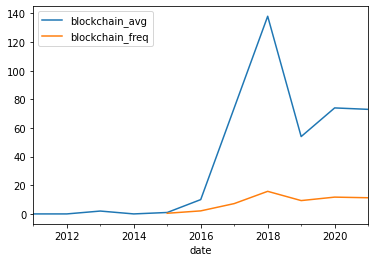

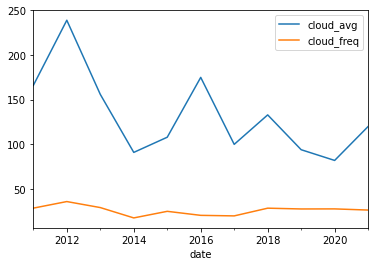

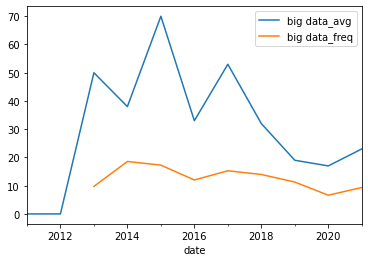

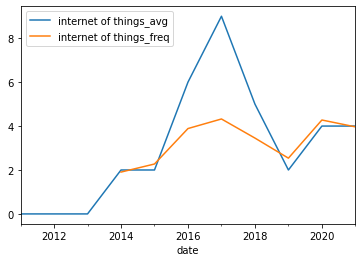

In [16]:
# Analyze
## How has the conversation about AI/ML changed over time? (Twitter frequency/average)
from web_observatory import analyze_twitter
avg, freq, total = analyze_twitter(words, terms = ["blockchain", "cloud", "big data", "internet of things"])
## Where the term conservation is used
#, freq, total = analyze_twitter(words.loc[words['nature']>0], ["artificial intelligence", "machine learning"])

In [17]:
## Are certain organizations (and organization sizes) more likely to mention AI/ML? (Crawl)
from web_observatory import analyze_orgs
avg, freq = analyze_orgs(words, orgs = ["raresites", "davidsuzuki", "grandriver", "wwf", "ecotrust", "natureconservancy"], terms = ["artificial intelligence", "forest", "machine learning"])
## Are certain organizations more likely to mention ethics terms in conjunction with AI/ML? (Crawl)
avg, freq = analyze_orgs(words.loc[(words["blockchain"]>0) | (words["big data"]>0) | (words["cloud"]>0) | (words["internet of things"]>0)], orgs = ["raresites", "davidsuzuki", "grandriver", "wwf", "ecotrust", "natureconservancy"], terms = ["privacy", "surveillance"])
avg

,privacy_avg,surveillance_avg
raresites,0.0,0.0
davidsuzuki,0.0,0.0
grandriver,0.0,0.0
wwf,7.89,7.89
ecotrust,0.0,0.0
natureconservancy,0.0,0.0


blockchain cloud
Zeros: 24801, 93%
cloud but not blockchain: 1276, 4%
blockchain but not cloud: 375, 1%
Together: 74, 0%




,blockchain,cloud
blockchain,1.000000,-0.041669
cloud,-0.041669,1.000000


<AxesSubplot:xlabel='blockchain', ylabel='cloud'>

cloud blockchain
Zeros: 24801, 93%
blockchain but not cloud: 375, 1%
cloud but not blockchain: 1276, 4%
Together: 74, 0%




,cloud,blockchain
cloud,1.000000,-0.041669
blockchain,-0.041669,1.000000


<AxesSubplot:xlabel='cloud', ylabel='blockchain'>

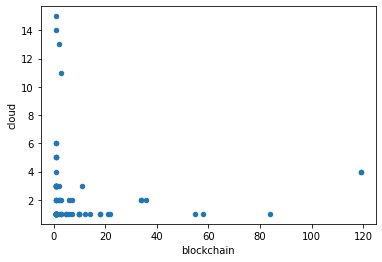

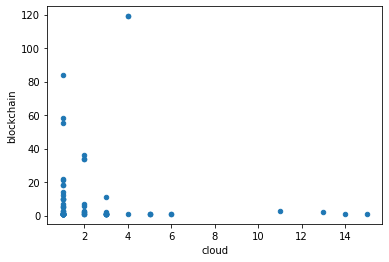

In [20]:
## Are certain topics associated with other (e.g. forest and AI vs mountain and AI?) (Twitter, Google, and Crawl)
from web_observatory import analyze_term_correlations
#analyze_term_correlations(words, ["artificial intelligence", "river", " ai "])
analyze_term_correlations(words, ["blockchain", "cloud"])